In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading training files
features = pd.read_csv('dengue_features_train.csv')
labels = pd.read_csv('dengue_labels_train.csv')

In [3]:
# sub data
sub_data = pd.read_csv('dengue_features_test.csv')

In [4]:
# merging training data
data = features.merge(labels, left_index=True, right_index=True)

In [5]:
data.head()

,city_x,year_x,weekofyear_x,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_y,year_y,weekofyear_y,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,2.628571,25.442857,6.900000,29.4,20.0,16.0,sj,1990,18,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,2.371429,26.714286,6.371429,31.7,22.2,8.6,sj,1990,19,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,2.300000,26.714286,6.485714,32.2,22.8,41.4,sj,1990,20,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,2.428571,27.471429,6.771429,33.3,23.3,4.0,sj,1990,21,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,3.014286,28.942857,9.371429,35.0,23.9,5.8,sj,1990,22,6


In [6]:
# we see that city, year and weekofyear duplicate with y-data so we drop them
data=data.drop(['city_y','year_y','weekofyear_y'], axis=1)

In [7]:
# separating numeric 
numeric=[col for col in data.columns if data[col].dtypes != 'object']

In [8]:
# sub data
sub_numeric=[col for col in sub_data.columns if sub_data[col].dtypes != 'object']

In [9]:
numeric

['year_x',
 'weekofyear_x',
 'ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm',
 'total_cases']

In [10]:
# sub data
sub_numeric

['year',
 'weekofyear',
 'ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm']

In [11]:
# separating categorical
categorical = data.drop(numeric, axis=1).columns

In [12]:
#sub data
sub_categorical = sub_data.drop(sub_numeric, axis=1).columns

In [13]:
categorical

Index(['city_x', 'week_start_date'], dtype='object')

In [14]:
# sub data
sub_categorical

Index(['city', 'week_start_date'], dtype='object')

In [15]:
# data has been basically prepared for exploration and preprocessing

In [16]:
# EDA

In [17]:
# let's check the correlation between numeric features and the label - the total cases of occurence of the disease

In [18]:
data[numeric].corrwith(data['total_cases'])

year_x                                  -0.306806
weekofyear_x                             0.216452
ndvi_ne                                 -0.241376
ndvi_nw                                 -0.202235
ndvi_se                                 -0.168612
ndvi_sw                                 -0.196461
precipitation_amt_mm                    -0.038740
reanalysis_air_temp_k                    0.264952
reanalysis_avg_temp_k                    0.151637
reanalysis_dew_point_temp_k              0.142531
reanalysis_max_air_temp_k               -0.191345
reanalysis_min_air_temp_k                0.325252
reanalysis_precip_amt_kg_per_m2         -0.010031
reanalysis_relative_humidity_percent    -0.132452
reanalysis_sat_precip_amt_mm            -0.038740
reanalysis_specific_humidity_g_per_kg    0.129861
reanalysis_tdtr_k                       -0.278483
station_avg_temp_c                       0.116109
station_diur_temp_rng_c                 -0.237844
station_max_temp_c                      -0.039219


In [19]:
# it is good that most of the feautures have clear correlation with our target with very few exceptions that will be analysed
# for now, we keep all the features

In [20]:
# Data Visualization

In [21]:
# removing the total_cases label only for the visualization
numeric_pairplot = numeric.copy()
numeric_pairplot.remove('total_cases')

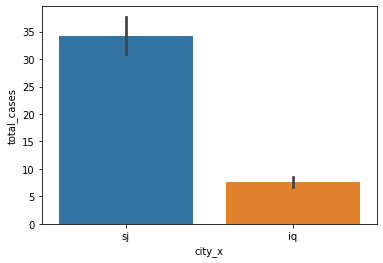

In [22]:
# ploting categorical data
sns.barplot(data=data, x='city_x', y='total_cases')

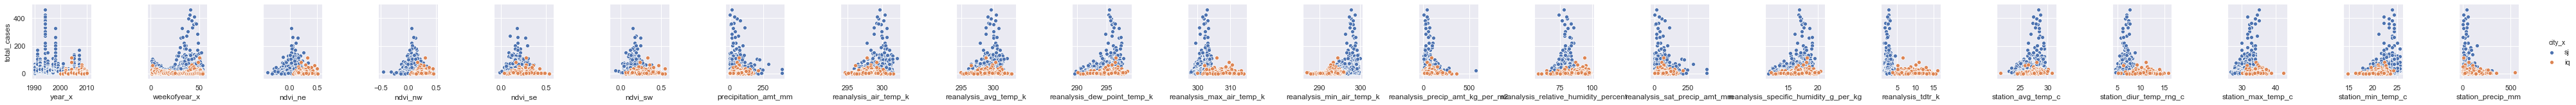

In [23]:
# pair plotting numeric data
sns.set()
sns.pairplot(data=data, x_vars=numeric_pairplot, y_vars='total_cases', hue='city_x')

In [24]:
# there is too big difference between the two cities so when preprocessing data, it would be wise to do it per city

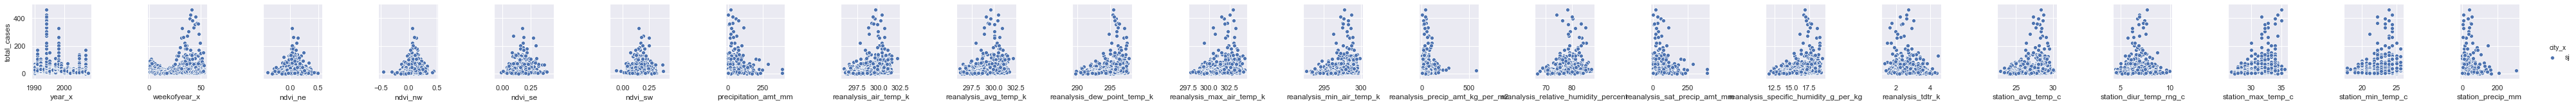

In [25]:
# pair plotting by city
# 'sj'
sns.set()
sns.pairplot(data=data[data['city_x']=='sj'], x_vars=numeric_pairplot, y_vars='total_cases', hue='city_x')

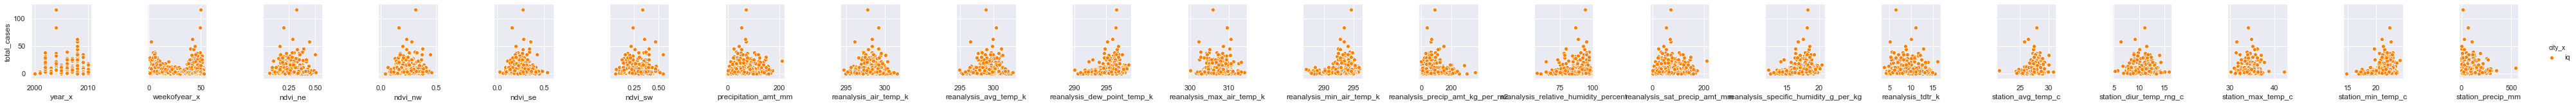

In [26]:
# 'iq'
sns.set()
sns.pairplot(data=data[data['city_x']=='iq'], x_vars=numeric_pairplot, y_vars='total_cases', hue='city_x', palette='autumn')

In [27]:
# let's convert date column 'week_start_date' to datetime
data['week_start_date']=pd.to_datetime(data['week_start_date'])

In [28]:
#sub data
sub_data['week_start_date']=pd.to_datetime(sub_data['week_start_date'])

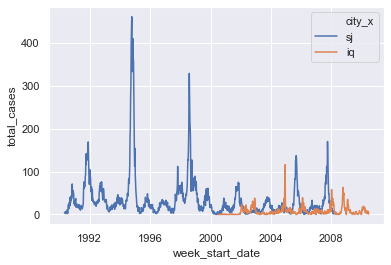

In [29]:
sns.lineplot(data=data, x='week_start_date', y='total_cases', hue='city_x')

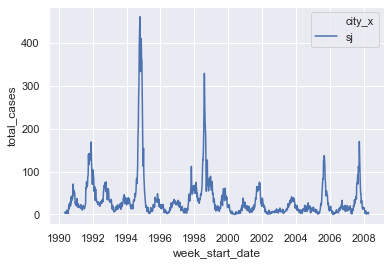

In [30]:
# plot by city
sns.lineplot(data=data[data['city_x']=='sj'], x='week_start_date', y='total_cases', hue='city_x')

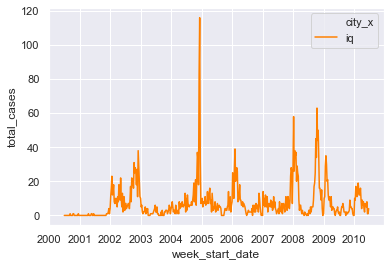

In [31]:
sns.lineplot(data=data[data['city_x']=='iq'], x='week_start_date', y='total_cases', hue='city_x', palette='autumn')

In [32]:
# descriptive statistics mainly to compare mean and median of numeric features
mean_median_table = pd.DataFrame({'mean': data[numeric].mean(), 'median': data[numeric].median(), 'min': data[numeric].min(), 'max': data[numeric].max()})
mean_median_table

,mean,median,min,max
year_x,2001.031593,2002.000000,1990.000000,2010.000000
weekofyear_x,26.503434,26.500000,1.000000,53.000000
ndvi_ne,0.142294,0.128817,-0.406250,0.508357
ndvi_nw,0.130553,0.121429,-0.456100,0.454429
ndvi_se,0.203783,0.196050,-0.015533,0.538314
ndvi_sw,0.202305,0.189450,-0.063457,0.546017
precipitation_amt_mm,45.760388,38.340000,0.000000,390.600000
reanalysis_air_temp_k,298.701852,298.646429,294.635714,302.200000
reanalysis_avg_temp_k,299.225578,299.289286,294.892857,302.928571
reanalysis_dew_point_temp_k,295.246356,295.640714,289.642857,298.450000


In [33]:
# sub data
sub_mean_median_table = pd.DataFrame({'mean': sub_data[sub_numeric].mean(), 'median': sub_data[sub_numeric].median(), 'min': sub_data[sub_numeric].min(), 'max': sub_data[sub_numeric].max()})
sub_mean_median_table

,mean,median,min,max
year,2010.766827,2011.000000,2008.000000,2013.000000
weekofyear,26.439904,26.000000,1.000000,53.000000
ndvi_ne,0.126050,0.110100,-0.463400,0.500400
ndvi_nw,0.126803,0.088700,-0.211800,0.649000
ndvi_se,0.207702,0.204171,0.006200,0.453043
ndvi_sw,0.201721,0.186471,-0.014671,0.529043
precipitation_amt_mm,38.354324,31.455000,0.000000,169.340000
reanalysis_air_temp_k,298.818295,298.547143,294.554286,301.935714
reanalysis_avg_temp_k,299.353071,299.328571,295.235714,303.328571
reanalysis_dew_point_temp_k,295.419179,295.825000,290.818571,297.794286


In [34]:
# for features were mean is significantly different from the median, we should use the median when imputing missing values
# for the rest, we should use the mean
# let's separate features based on which will be imputed with what

In [35]:
# same statistics but split per city
mean_median_table_sj = pd.DataFrame({'mean': data[numeric][data['city_x']=='sj'].mean(), 'median': data[numeric][data['city_x']=='sj'].median(), 'min': data[numeric][data['city_x']=='sj'].min(), 'max': data[numeric][data['city_x']=='sj'].max()})
mean_median_table_sj

,mean,median,min,max
year_x,1998.826923,1999.000000,1990.000000,2008.000000
weekofyear_x,26.503205,26.500000,1.000000,53.000000
ndvi_ne,0.057925,0.057700,-0.406250,0.493400
ndvi_nw,0.067469,0.068075,-0.456100,0.437100
ndvi_se,0.177655,0.177186,-0.015533,0.393129
ndvi_sw,0.165956,0.165971,-0.063457,0.381420
precipitation_amt_mm,35.470809,20.800000,0.000000,390.600000
reanalysis_air_temp_k,299.163653,299.254286,295.938571,302.200000
reanalysis_avg_temp_k,299.276920,299.378571,296.114286,302.164286
reanalysis_dew_point_temp_k,295.109519,295.464286,289.642857,297.795714


In [36]:
# sub data
sub_mean_median_table_sj = pd.DataFrame({'mean': sub_data[sub_numeric][sub_data['city']=='sj'].mean(), 'median': sub_data[sub_numeric][sub_data['city']=='sj'].median(), 'min': sub_data[sub_numeric][sub_data['city']=='sj'].min(), 'max': sub_data[sub_numeric][sub_data['city']=='sj'].max()})
sub_mean_median_table_sj

,mean,median,min,max
year,2010.326923,2010.000000,2008.000000,2013.000000
weekofyear,26.503846,26.500000,1.000000,53.000000
ndvi_ne,0.024801,0.014975,-0.463400,0.500400
ndvi_nw,0.036730,0.032140,-0.211800,0.649000
ndvi_se,0.177055,0.169350,0.006200,0.385383
ndvi_sw,0.153226,0.148017,-0.014671,0.318129
precipitation_amt_mm,26.521124,13.975000,0.000000,169.340000
reanalysis_air_temp_k,299.458051,299.753571,296.651429,301.507143
reanalysis_avg_temp_k,299.542968,299.782143,296.792857,301.542857
reanalysis_dew_point_temp_k,295.322004,295.660000,290.818571,297.794286


In [37]:
# sj
data_sj = data[data['city_x']=='sj']
#sj_median_columns = ['precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_sat_precip_amt_mm', 'station_precip_mm']
#sj_mean_columns = data_sj.drop(sj_median_columns, axis=1).drop(['city_x', 'week_start_date'], axis=1).columns

In [38]:
# sub data
sub_data_sj = sub_data[sub_data['city']=='sj']

In [39]:
# same statistics but split per city
mean_median_table_iq = pd.DataFrame({'mean': data[numeric][data['city_x']=='iq'].mean(), 'median': data[numeric][data['city_x']=='iq'].median(), 'min': data[numeric][data['city_x']=='iq'].min(), 'max': data[numeric][data['city_x']=='iq'].max()})
mean_median_table_iq

,mean,median,min,max
year_x,2005.000000,2005.000000,2000.000000,2010.000000
weekofyear_x,26.503846,26.500000,1.000000,53.000000
ndvi_ne,0.263869,0.263643,0.061729,0.508357
ndvi_nw,0.238783,0.232971,0.035860,0.454429
ndvi_se,0.250126,0.249800,0.029880,0.538314
ndvi_sw,0.266779,0.262143,0.064183,0.546017
precipitation_amt_mm,64.245736,60.470000,0.000000,210.830000
reanalysis_air_temp_k,297.869538,297.822857,294.635714,301.637143
reanalysis_avg_temp_k,299.133043,299.121429,294.892857,302.928571
reanalysis_dew_point_temp_k,295.492982,295.852143,290.088571,298.450000


In [40]:
# sub data
sub_mean_median_table_iq = pd.DataFrame({'mean': sub_data[sub_numeric][sub_data['city']=='iq'].mean(), 'median': sub_data[sub_numeric][sub_data['city']=='iq'].median(), 'min': sub_data[sub_numeric][sub_data['city']=='iq'].min(), 'max': sub_data[sub_numeric][sub_data['city']=='iq'].max()})
sub_mean_median_table_iq

,mean,median,min,max
year,2011.500000,2011.500000,2010.000000,2013.000000
weekofyear,26.333333,26.000000,1.000000,52.000000
ndvi_ne,0.266889,0.265229,0.089286,0.429986
ndvi_nw,0.270574,0.269462,0.063214,0.464800
ndvi_se,0.258583,0.253164,0.098257,0.453043
ndvi_sw,0.282235,0.281531,0.081957,0.529043
precipitation_amt_mm,57.924615,51.290000,2.280000,152.320000
reanalysis_air_temp_k,297.760238,297.752857,294.554286,301.935714
reanalysis_avg_temp_k,299.039011,299.003571,295.235714,303.328571
reanalysis_dew_point_temp_k,295.579890,295.935714,291.954286,297.725714


In [41]:
# iq
data_iq = data[data['city_x']=='iq']
#iq_median_columns = ['precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_sat_precip_amt_mm', 'station_avg_temp_c','station_max_temp_c', 'station_precip_mm']
#iq_mean_columns = data_iq.drop(iq_median_columns, axis=1).drop(['city_x', 'week_start_date'], axis=1).columns

In [42]:
# sub data
sub_data_iq = sub_data[sub_data['city']=='iq']

In [43]:
# PREPROCESSING

In [44]:
# Missing values

In [45]:
# numeric
# sj
data_sj.isnull().sum()

city_x                                     0
year_x                                     0
weekofyear_x                               0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_mi

In [46]:
# numeric
# iq
data_iq.isnull().sum()

city_x                                    0
year_x                                    0
weekofyear_x                              0
week_start_date                           0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c              

In [47]:
# !!! experiment with both median
# imputing missing values
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy='median')
#mean_imputer = SimpleImputer(strategy='mean')

In [48]:
#data_sj[sj_median_columns] = median_imputer.fit_transform(data_sj[sj_median_columns])
#data_sj[sj_mean_columns] = mean_imputer.fit_transform(data_sj[sj_mean_columns])
data_sj[numeric] = median_imputer.fit_transform(data_sj[numeric])

In [49]:
# sub data
sub_data_sj[sub_numeric] = median_imputer.fit_transform(sub_data_sj[sub_numeric])

In [50]:
#data_iq[iq_median_columns] = median_imputer.fit_transform(data_iq[iq_median_columns])
#data_iq[iq_mean_columns] = mean_imputer.fit_transform(data_iq[iq_mean_columns])
data_iq[numeric] = median_imputer.fit_transform(data_iq[numeric])

In [51]:
# sub data
sub_data_iq[sub_numeric] = median_imputer.fit_transform(sub_data_iq[sub_numeric])

In [52]:
# we need to replace the imputed sj and iq data into the original 'data' data frame to see the effect

In [53]:
#data_final = pd.concat([data_sj, data_iq])

In [54]:
# UPDATE !!!!
# we will train 2 models per city since data is ordered both in train and test files

In [55]:
# double checking that final data has no missing values
#data_final.isnull().sum()

In [56]:
# ENCODING categorical variables

In [57]:
#data_final[categorical]

In [58]:
# week_start_date seems like not very useful feature, except for plotting data and EDA
# will drop it for the purpose of categorical data encoding

In [59]:
#data_final = pd.get_dummies(data_final).drop('week_start_date', axis=1)

In [60]:
data_sj

,city_x,year_x,weekofyear_x,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990.0,18.0,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0
1,sj,1990.0,19.0,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0
2,sj,1990.0,20.0,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0
3,sj,1990.0,21.0,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0
4,sj,1990.0,22.0,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,sj,2008.0,13.0,2008-03-25,0.077850,-0.039900,0.310471,0.296243,27.19,296.958571,...,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8,4.0
932,sj,2008.0,14.0,2008-04-01,-0.038000,-0.016833,0.119371,0.066386,3.82,298.081429,...,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,3.0
933,sj,2008.0,15.0,2008-04-08,-0.155200,-0.052750,0.137757,0.141214,16.96,297.460000,...,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1.0
934,sj,2008.0,16.0,2008-04-15,0.001800,0.068075,0.203900,0.209843,0.00,297.630000,...,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2,3.0


In [61]:
data_sj = data_sj.drop(['week_start_date', 'city_x'], axis=1)
data_iq = data_iq.drop(['week_start_date', 'city_x'], axis=1)

In [62]:
# sub data
sub_data_sj = sub_data_sj.drop(['week_start_date', 'city'], axis=1)
sub_data_iq = sub_data_iq.drop(['week_start_date', 'city'], axis=1)

In [63]:
# let's shuffle data so that we don't have the sj rows on top
#for i in range(10000):
#    data_final = data_final.sample(frac=1.0, random_state=1)

In [64]:
#data_final

In [100]:
sub_data_iq

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_min_temp_c
260,2010.0,26.0,0.183783,0.142500,0.225129,0.150214,297.648571,299.214286,296.118571,307.9,293.7,92.581429,17.654286,9.428571,27.440,10.760,21.5
261,2010.0,27.0,0.291657,0.272267,0.330700,0.320914,298.224286,299.464286,294.831429,307.7,292.2,83.885714,16.320000,10.157143,27.025,9.625,21.2
262,2010.0,28.0,0.208543,0.366457,0.212629,0.255514,297.955714,298.964286,296.417143,306.4,292.5,92.057143,18.030000,9.557143,26.950,10.350,21.6
263,2010.0,29.0,0.089286,0.063214,0.122057,0.081957,295.715714,296.642857,293.638571,306.4,289.3,88.970000,15.394286,7.828571,26.900,9.700,14.2
264,2010.0,30.0,0.306100,0.327683,0.250086,0.267914,298.502857,300.000000,293.892857,308.1,290.5,78.610000,15.468571,11.771429,27.050,11.850,16.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,2013.0,22.0,0.301471,0.380029,0.280629,0.383186,297.774286,298.964286,295.638571,305.5,292.7,89.990000,17.185714,10.100000,27.400,9.050,21.8
412,2013.0,23.0,0.247600,0.296343,0.285371,0.350357,297.167143,298.328571,295.845714,306.3,291.6,93.891429,17.448571,9.657143,27.520,10.720,21.4
413,2013.0,24.0,0.238729,0.251029,0.252586,0.249771,295.831429,296.607143,294.894286,304.6,290.7,94.967143,16.410000,7.385714,27.200,10.075,21.6
414,2013.0,25.0,0.310429,0.302700,0.406614,0.403943,295.778571,297.400000,293.648571,305.9,292.5,89.057143,15.137143,8.228571,26.700,8.480,21.8


In [66]:
# here we can play with features before modelling
#data_final=data_final.drop(['precipitation_amt_mm','reanalysis_precip_amt_kg_per_m2', 'reanalysis_sat_precip_amt_mm', 'station_max_temp_c','station_precip_mm'], axis=1)

In [67]:
data_sj=data_sj.drop(['precipitation_amt_mm','reanalysis_precip_amt_kg_per_m2', 'reanalysis_sat_precip_amt_mm', 'station_max_temp_c','station_precip_mm'], axis=1)
data_iq=data_iq.drop(['precipitation_amt_mm','reanalysis_precip_amt_kg_per_m2', 'reanalysis_sat_precip_amt_mm', 'station_max_temp_c','station_precip_mm'], axis=1)
sub_data_sj=sub_data_sj.drop(['precipitation_amt_mm','reanalysis_precip_amt_kg_per_m2', 'reanalysis_sat_precip_amt_mm', 'station_max_temp_c','station_precip_mm'], axis=1)
sub_data_iq=sub_data_iq.drop(['precipitation_amt_mm','reanalysis_precip_amt_kg_per_m2', 'reanalysis_sat_precip_amt_mm', 'station_max_temp_c','station_precip_mm'], axis=1)

In [68]:
# MODELING

In [69]:
# splitting train and test data
from sklearn.model_selection import train_test_split

#X = data_final.drop('total_cases', axis=1)
#y = data_final['total_cases']

X_sj = data_sj.drop('total_cases', axis=1)
y_sj = data_sj['total_cases']

X_iq = data_iq.drop('total_cases', axis=1)
y_iq = data_iq['total_cases']

In [70]:
sub_X_sj = sub_data_sj.copy()
sub_X_iq = sub_data_iq.copy()

In [71]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=1)

In [72]:
X_sj_train, X_sj_test, y_sj_train, y_sj_test = train_test_split(X_sj, y_sj, train_size=0.80, test_size=0.20, random_state=1)

In [73]:
X_iq_train, X_iq_test, y_iq_train, y_iq_test = train_test_split(X_iq, y_iq, train_size=0.80, test_size=0.20, random_state=1)

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

forest=RandomForestRegressor(random_state=1, criterion='mae')
mae=mean_absolute_error

# hyperparameter tuning
tuning_list = {'n_estimators': [100,200,300,400,500,600,800,1000], 'min_samples_split': [2,3,4,5,6,7,8,9,10], 'min_samples_leaf': [1,2,3,4,5]}
forest_sj = GridSearchCV(forest, tuning_list, n_jobs=-1, verbose=2, cv=5, scoring='neg_mean_absolute_error')
forest_iq = GridSearchCV(forest, tuning_list, n_jobs=-1, verbose=2, cv=5, scoring='neg_mean_absolute_error')
forest_sj_full = GridSearchCV(forest, tuning_list, n_jobs=-1, verbose=2, cv=5, scoring='neg_mean_absolute_error')
forest_iq_full = GridSearchCV(forest, tuning_list, n_jobs=-1, verbose=2, cv=5, scoring='neg_mean_absolute_error')

In [75]:
#forest.fit(X_train, y_train)

In [76]:
# sj train only
forest_sj.fit(X_sj_train, y_sj_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   29.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimators': [100, 200, 300, 400,

In [77]:
forest_iq.fit(X_iq_train, y_iq_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   15.5s finished
C:\Users\zarko.rashev\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimators': [100, 200, 300, 400,

In [78]:
forest_sj.best_params_

{'n_estimators': 400}

In [79]:
forest_iq.best_params_

{'n_estimators': 600}

In [80]:
# same training but with 100% data
forest_sj_full.fit(X_sj, y_sj)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   32.5s finished
C:\Users\zarko.rashev\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimators': [100, 200, 300, 400,

In [81]:
forest_iq_full.fit(X_iq, y_iq)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   22.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimators': [100, 200, 300, 400,

In [82]:
forest_sj_full.best_params_

{'n_estimators': 200}

In [83]:
forest_iq_full.best_params_

{'n_estimators': 600}

In [84]:
test_result_sj = forest_sj.predict(X_sj_test)

In [85]:
test_result_iq = forest_iq.predict(X_iq_test)

In [86]:
test_result_sj_full = forest_sj_full.predict(X_sj)

In [87]:
test_result_iq_full = forest_iq_full.predict(X_iq)

In [88]:
mae(y_sj_test, test_result_sj)

14.998417553191489

In [89]:
mae(y_iq_test, test_result_iq)

5.216201923076922

In [90]:
mae(y_sj, test_result_sj_full)

4.909529914529914

In [91]:
mae(y_iq, test_result_iq_full)

1.96038141025641

In [92]:
# scoring is good but we can try removing some low correlation fetures

In [121]:
# submission dataframes
submission_sj_final = pd.DataFrame({'city': 'sj', 'year': sub_X_sj['year'].astype('int64'), 'weekofyear': sub_X_sj['weekofyear'].astype('int64'), 'total_cases': forest_sj.predict(sub_X_sj).astype('int64')})

submission_iq_final= pd.DataFrame({'city': 'iq', 'year': sub_X_iq['year'].astype('int64'), 'weekofyear': sub_X_iq['weekofyear'].astype('int64'), 'total_cases': forest_iq.predict(sub_X_iq).astype('int64')})

submission_sj_iq_final = pd.concat([submission_sj_final, submission_iq_final])

In [128]:
submission_sj_iq_final

,city,year,weekofyear,total_cases
0,sj,2008,18,4
1,sj,2008,19,5
2,sj,2008,20,5
3,sj,2008,21,9
4,sj,2008,22,7
...,...,...,...,...
411,iq,2013,22,5
412,iq,2013,23,3
413,iq,2013,24,1
414,iq,2013,25,4


In [124]:
# submission dataframes FULL
submission_sj_full_final = pd.DataFrame({'city': 'sj', 'year': sub_X_sj['year'].astype('int64'), 'weekofyear': sub_X_sj['weekofyear'].astype('int64'), 'total_cases': forest_sj_full.predict(sub_X_sj).astype('int64')})

submission_iq_full_final= pd.DataFrame({'city': 'iq', 'year': sub_X_iq['year'].astype('int64'), 'weekofyear': sub_X_iq['weekofyear'].astype('int64'), 'total_cases': forest_iq_full.predict(sub_X_iq).astype('int64')})

submission_sj_iq_full_final = pd.concat([submission_sj_full_final, submission_iq_full_final])

In [129]:
submission_sj_iq_full_final

,city,year,weekofyear,total_cases
0,sj,2008,18,4
1,sj,2008,19,5
2,sj,2008,20,5
3,sj,2008,21,8
4,sj,2008,22,7
...,...,...,...,...
411,iq,2013,22,5
412,iq,2013,23,3
413,iq,2013,24,1
414,iq,2013,25,5


In [131]:
submission_sj_iq_final.to_csv('submission_80.csv', index=False)

In [132]:
submission_sj_iq_full_final.to_csv('submission_full.csv', index=False)